# Prediction Model

Baseline Model - Tested cleaned data with 3 models, linear regression, lasso regression and ridge regression

In [221]:
import os
import sys

# Get the absolute path to the 'util' directory (assuming 'eda.ipynb' is one level down from 'your_project')
data_dir = os.path.abspath(os.path.join('data'))

# Add the 'util' directory to sys.path if it's not already there
if data_dir not in sys.path:
    sys.path.append(data_dir)
data_dir

# Get the absolute path to the 'util' directory (assuming 'eda.ipynb' is one level down from 'your_project')
util_dir = os.path.abspath(os.path.join('utils'))

# Add the 'util' directory to sys.path if it's not already there
if util_dir not in sys.path:
    sys.path.append(util_dir)

In [222]:
import pandas as pd
import numpy as np
import numpy as np

df = pd.read_csv(data_dir+"/supervised_leaned_eda.csv")
df.columns

Index(['ZIP Code', 'Cov C Amount Weighted Avg', 'Avg Fire Risk Score',
       'Number of Negligible Fire Risk Exposure',
       'Number of Low Fire Risk Exposure',
       'Number of Moderate Fire Risk Exposure',
       'Number of High Fire Risk Exposure',
       'Number of Very High Fire Risk Exposure', 'Earned Premium 2020',
       'Earned Exposure 2020', 'Non-CAT Cov A Smoke - Incurred Losses',
       'Non-CAT Cov A Smoke - Number of Claims',
       'Non-CAT Cov C Fire - Incurred Losses',
       'Non-CAT Cov C Fire - Number of Claims',
       'Non-CAT Cov C Smoke - Incurred Losses',
       'Non-CAT Cov C Smoke - Number of Claims',
       'CAT Cov A Smoke - Incurred Losses',
       'CAT Cov A Smoke - Number of Claims', 'Earned Premium 2021',
       'Earned Exposure 2021', 'Avg Premium 2021'],
      dtype='object')

In [223]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Avg Premium 2021","Earned Premium 2021", "Earned Exposure 2021","Earned Premium 2020","Earned Exposure 2020"])
y = df["Avg Premium 2021"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [224]:
import importlib
import ml
importlib.reload(ml)

lasso_regression(X_train, X_test, y_train, y_test)


📊 Lasso Regression Evaluation:
RMSE: 485.48
MAE: 293.62
R² Score: 0.4311


In [225]:
import ml
importlib.reload(ml)

linear_regression(X_train, X_test, y_train, y_test)

📊 Linear Regression Evaluation:
RMSE: 446.67
MAE: 263.22
R² Score: 0.5184


In [226]:
import ml
importlib.reload(ml)

ridge, y_pred=ridge_regression(X_train, X_test, y_train, y_test)

📊 Ridge Regression Evaluation:
RMSE: 446.57
MAE: 262.86
R² Score: 0.5186


                                    Feature  Coefficient
2                       Avg Fire Risk Score   315.736145
11    Non-CAT Cov C Fire - Number of Claims    32.631015
13   Non-CAT Cov C Smoke - Number of Claims   -15.471876
15       CAT Cov A Smoke - Number of Claims     7.097432
9    Non-CAT Cov A Smoke - Number of Claims     7.054301
7    Number of Very High Fire Risk Exposure     0.824672
6         Number of High Fire Risk Exposure    -0.493729
4          Number of Low Fire Risk Exposure    -0.244195
5     Number of Moderate Fire Risk Exposure     0.058399
0                                  ZIP Code    -0.048714
3   Number of Negligible Fire Risk Exposure     0.037987
1                 Cov C Amount Weighted Avg     0.004223
12    Non-CAT Cov C Smoke - Incurred Losses     0.002866
14        CAT Cov A Smoke - Incurred Losses    -0.000687
8     Non-CAT Cov A Smoke - Incurred Losses    -0.000619
10     Non-CAT Cov C Fire - Incurred Losses    -0.000116


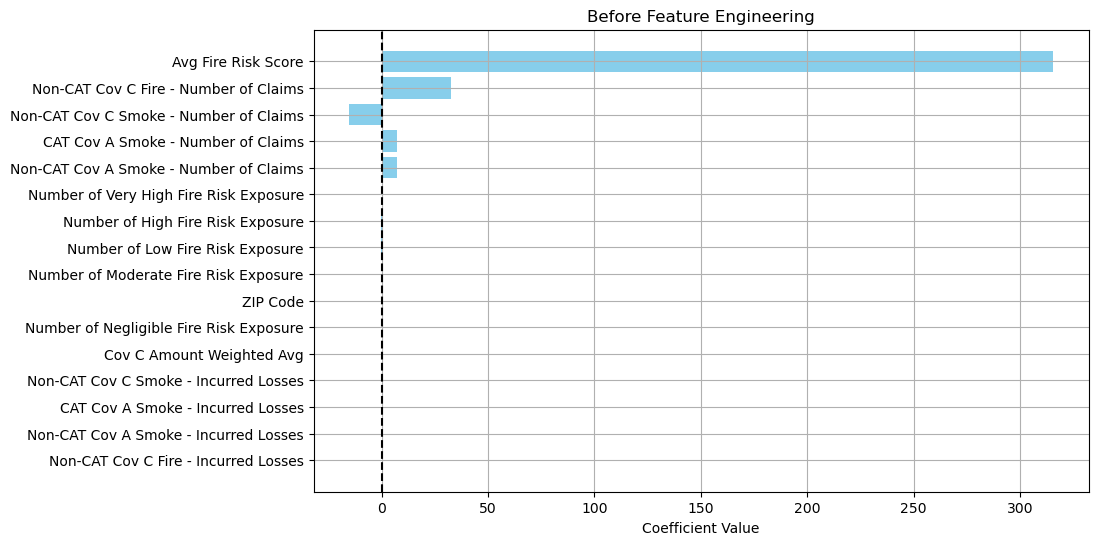

In [227]:
import ml
importlib.reload(ml)
from ml import coefficients_plot

coefficients_plot(ridge, X.columns, "Before Feature Engineering")



I selected Ridge as the baseline because:

1. It marginally outperformed Linear Regression (RMSE 446.57 vs. 446.67) while being more robust to future multicollinearity.

2. Lasso’s performance drop (R² 0.43 vs. 0.52) indicated it over-penalized useful features.      |

#  Model with new engineered features

In [234]:
df = pd.read_csv(data_dir+"/supervised_feature_engineered_eda.csv")
df.head()
X = df.drop(columns=["Earned Premium 2021","Earned Exposure 2021","Avg Premium 2021","Avg Premium"])
y = df["Avg Premium 2021"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
X.columns

Index(['ZIP Code', 'Cov C Amount Weighted Avg', 'Avg Fire Risk Score',
       'Number of Negligible Fire Risk Exposure',
       'Number of Low Fire Risk Exposure',
       'Number of Moderate Fire Risk Exposure',
       'Number of High Fire Risk Exposure',
       'Number of Very High Fire Risk Exposure',
       'Non-CAT Cov A Smoke - Incurred Losses',
       'Non-CAT Cov A Smoke - Number of Claims',
       'Non-CAT Cov C Fire - Incurred Losses',
       'Non-CAT Cov C Fire - Number of Claims',
       'Non-CAT Cov C Smoke - Incurred Losses',
       'Non-CAT Cov C Smoke - Number of Claims',
       'CAT Cov A Smoke - Incurred Losses', 'Total CAT Claims', 'Avg CAT Loss',
       'Avg Non-CAT Loss', 'Avg CAT Claims', 'Avg Non-CAT Claims',
       'Claim Frequency', 'Average Claim Severity'],
      dtype='object')

In [236]:
import ml
importlib.reload(ml)
from ml import ridge_regression
ridge, y_pred = ridge_regression(X_train, X_test, y_train, y_test)

📊 Ridge Regression Evaluation:
RMSE: 454.42
MAE: 212.48
R² Score: 0.7826


                                    Feature  Coefficient
2                       Avg Fire Risk Score   278.836353
11    Non-CAT Cov C Fire - Number of Claims    17.058215
19                       Avg Non-CAT Claims     8.370551
18                           Avg CAT Claims    -5.936134
13   Non-CAT Cov C Smoke - Number of Claims     5.207427
20                          Claim Frequency     2.434417
9    Non-CAT Cov A Smoke - Number of Claims     1.617446
7    Number of Very High Fire Risk Exposure     0.920429
6         Number of High Fire Risk Exposure    -0.216895
15                         Total CAT Claims     0.193243
4          Number of Low Fire Risk Exposure    -0.079782
5     Number of Moderate Fire Risk Exposure     0.073442
0                                  ZIP Code    -0.035804
16                             Avg CAT Loss    -0.026244
17                         Avg Non-CAT Loss     0.009500
1                 Cov C Amount Weighted Avg     0.003200
3   Number of Negligible Fire R

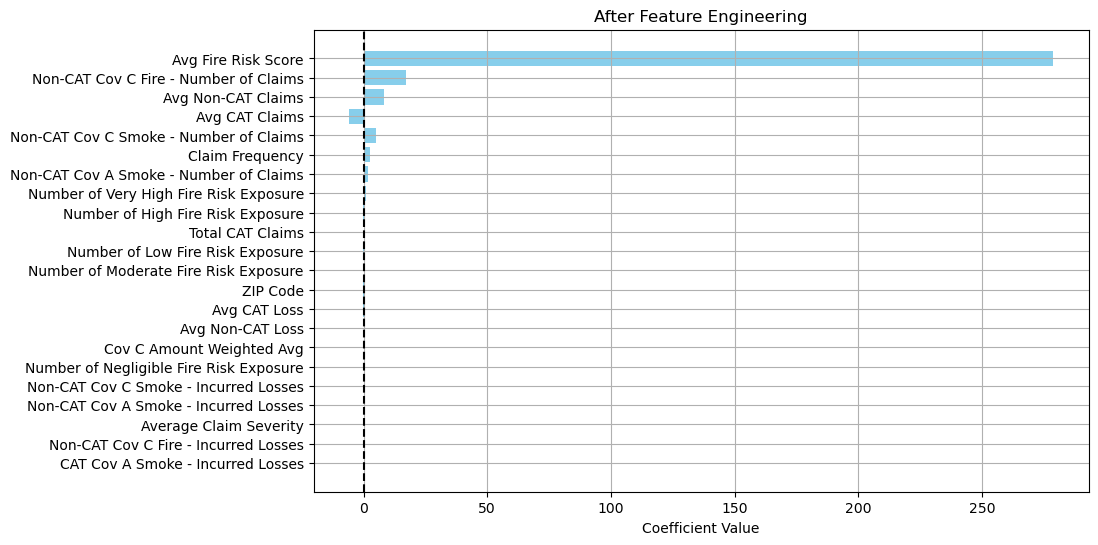

In [237]:


coefficients_plot(ridge, X.columns, "After Feature Engineering")



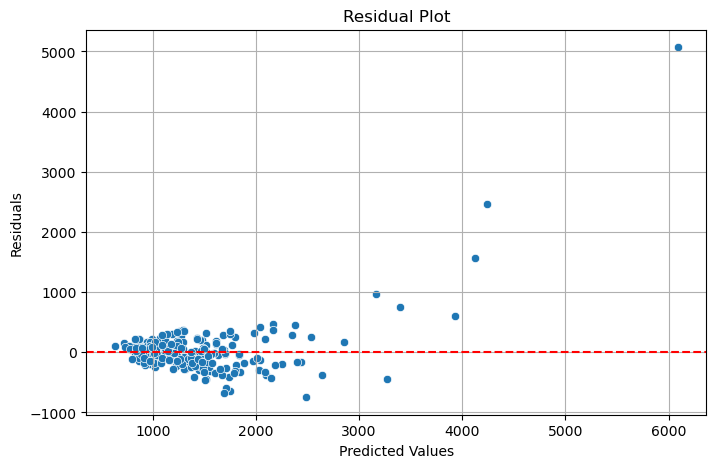

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have your predictions and actual values
# y_test = actual values
# y_pred = predicted values

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


## Summary

I started with a Ridge Regression model(after exploring the other linear models) using raw features derived from historical insurance loss and exposure data. The initial model yielded a moderate R² score of 0.5186 and RMSE of 446.57 on the validation set, indicating limited explanatory power.


Model Performance Comparison After Feature Engineering

| Metric   | Before Feature Engineering | After Feature Engineering | Percentage |
| -------- | -------------------------- | ------------------------- | ------------------------- |
| R² Score | __0.5186__                 | __0.7826__                 | +50.91% | 
| RMSE     | 446.57                     | 454.4                      | +1.75%| 
| MAE      | __262.86__                 | __212.48__                 | -19.17%| 

Note: Premium rates from 2020 were excluded in both models to avoid data leakage. Including them inflated the R² to 99%, which aligns with actuarial practices where previous year premiums often serve as a baseline.

### Coefficient Plot:

#### Before feature Engineering:

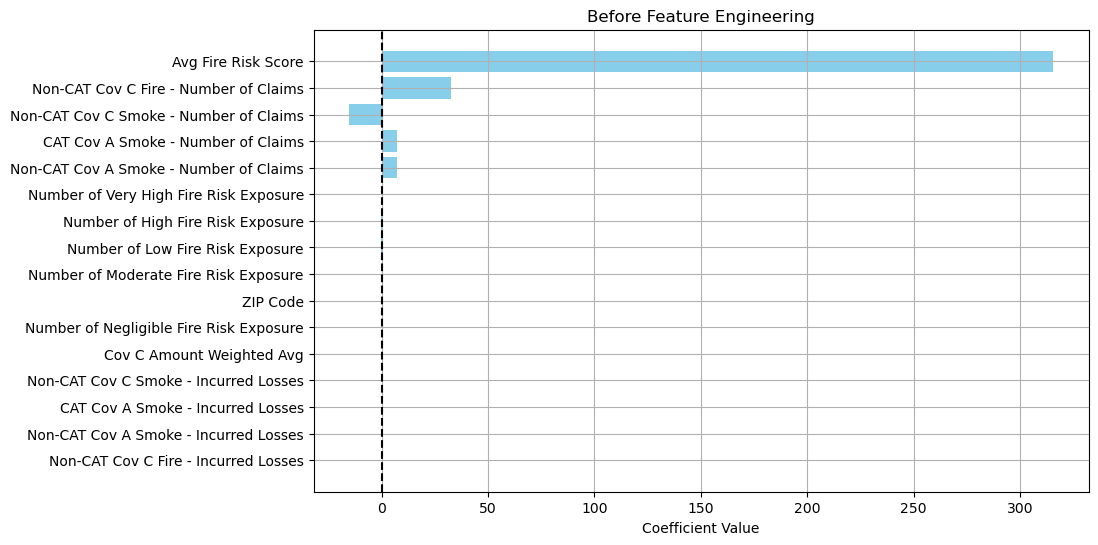

#### After feature Engineering:

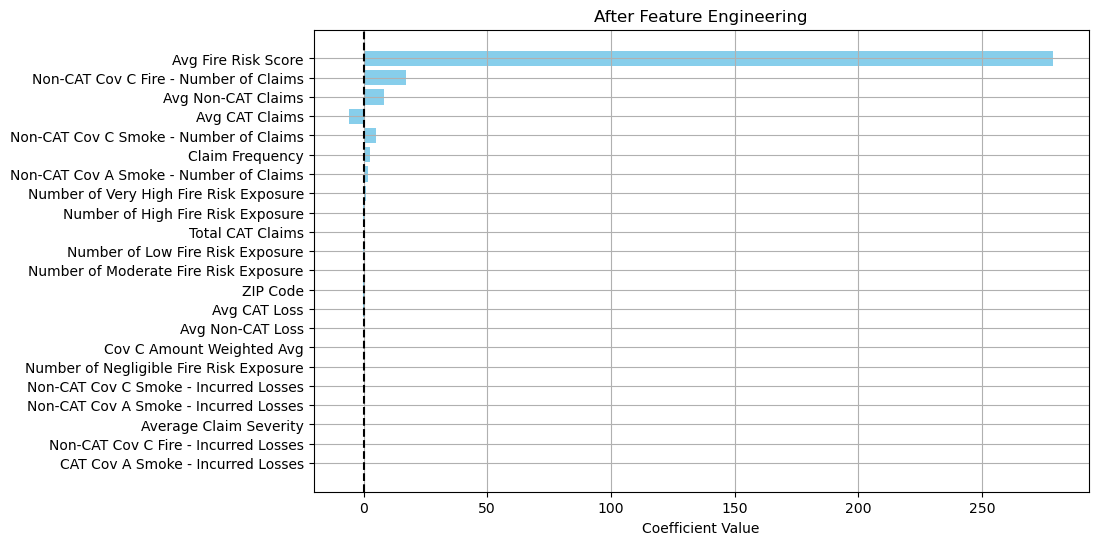

Interpretation:

The Avg Fire Risk Score was a strong predictor in both versions. After feature engineering, the model started leveraging more meaningful features like Avg Non-CAT Claims, Claim Frequency, and Avg CAT Claims, which enhanced generalization and interpretability. These features suggest a correlation between higher claim frequency/fire risk and increased premiums—but do not imply causation.

#### Residual Plot

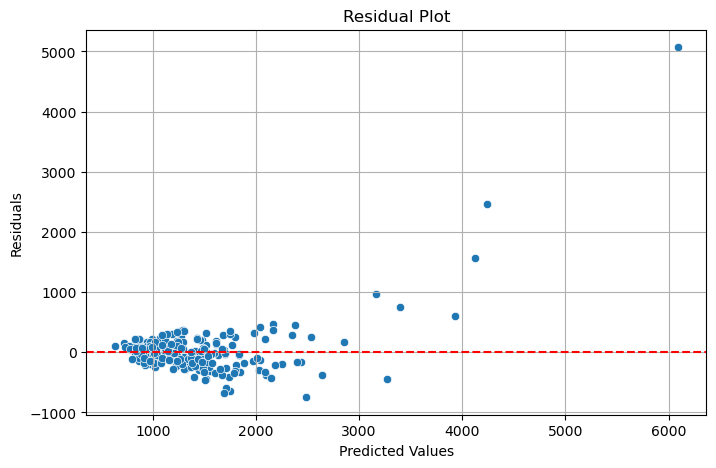

Residual = Actual - Predicted

The residual plot shows that the model predicts well for lower premium values (residuals centered around zero), but consistently underestimates higher premiums (predicted low value for higher premiums makes sense due to the large outliers), as seen by large positive residuals. This suggests potential heteroscedasticity and indicates the model struggles with high-value predictions, possibly due to skewed data


Future Work:

The aim of this analysis is to explore whether higher historical losses or elevated fire risk scores contribute to higher insurance premiums. While linear models like Ridge Regression have helped identify strong correlations—most notably with the Average Fire Risk Score—they do not establish causal relationships. Given the consistent prominence of this feature across both pre- and post-feature-engineered models, the next logical step is to apply causal inference techniques to investigate whether such variables directly influence premium increases, beyond mere correlation.

